# cat vs dog ann

In [15]:
import numpy as np

import tensorflow as tf
from tensorflow import keras
from keras import Sequential


from keras.layers import  Flatten , Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # ✅ Correct import
from keras.preprocessing import image

import matplotlib.pyplot as plt
# keras image data loading 

In [16]:
model = Sequential([
        Flatten(),
        (Dense(64, activation='relu')),
        (Dense(54, activation='relu')),
        (Dense(44, activation='relu')),
        (Dense(32, activation='relu')),
        (Dense(16, activation='relu')),
        (Dense(8, activation='relu')),
        (Dense(4, activation='relu')),
        (Dense(1, activation='sigmoid'))
])




model.compile(loss='binary_crossentropy', optimizer='adam')



In [17]:
#ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        r"C:\Users\91752\OneDrive - DIT University\Desktop\train",
        target_size=(64, 64),
        batch_size=2,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        r"C:\Users\91752\OneDrive - DIT University\Desktop\test",
        target_size=(64, 64),
        batch_size=2,
        class_mode='binary')

history = model.fit(train_generator,steps_per_epoch=2000,epochs=10,validation_data=test_generator)



Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 73s 34ms/step - loss: 0.6932 - val_loss: 0.6932
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 78s 39ms/step - loss: 0.6933 - val_loss: 0.6932
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 100s 50ms/step - loss: 0.6933 - val_loss: 0.6932
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 102s 51ms/step - loss: 0.6934 - val_loss: 0.6931
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 97s 49ms/step - loss: 0.6932 - val_loss: 0.6933
Epoch 6/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 84s 42ms/step - loss: 0.6936 - val_loss: 0.6932
Epoch 7/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 111s 55ms/step - loss: 0.6934 - val_loss: 0.6932
Epoch 8/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 83s 41ms/step - loss: 0.6931 - val_loss: 0.6932
Epoch 9/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 74s 37ms/step - loss: 0.6933 - val_loss: 0.6935
Epoch 10/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 62s 31ms/step - loss: 0.6940 - val_loss: 0.6932


In [19]:

img = image.load_img(r"C:\Users\91752\OneDrive - DIT University\Desktop\val_dog.jpeg", target_size=(64,64))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
i = model.predict(img)
 
if i[0][0] < 0.5:
    print("dog")
else:
    print("cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
cat


In [20]:
plt.plot(history.history['accuracy'], color = 'red', label='train')
plt.plot(history.history['val_accuracy'], color = 'blue', label='val')
plt.legend()
plt.show()

KeyError: 'accuracy'

# cat vs dog cnn (main_model)

In [21]:
import numpy as np

import tensorflow as tf
from tensorflow import keras
from keras import Sequential

from keras.layers import Conv2D , MaxPooling2D , Flatten , Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator  
from keras.preprocessing import image

import cv2

import matplotlib.pyplot as plt
# keras image data loading 

In [22]:

train_ds = keras.utils.image_dataset_from_directory(
    directory = r"C:\Users\91752\OneDrive - DIT University\Desktop\train",
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256),
)

test_ds = keras.utils.image_dataset_from_directory(
    directory = r"C:\Users\91752\OneDrive - DIT University\Desktop\test",
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256),
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [24]:
# scaling

def process(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

In [26]:
# cnn 

model = Sequential([
    Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape = (256,256,3)),
    MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'),
    Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'),
    MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'),
    Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'),
    MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'),
    Flatten(),
    (Dense(128, activation='relu')),
    (Dense(64, activation='relu')),
    (Dense(1, activation='sigmoid')),
])

model.compile(optimizer = "adam", loss="binary_crossentropy", metrics = ['accuracy'])

history = model.fit(train_ds, steps_per_epoch=2000, epochs = 10, validation_data = test_ds)

Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1040s 514ms/step - accuracy: 0.6370 - loss: 0.6223 - val_accuracy: 0.7742 - val_loss: 0.4990
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1061s 529ms/step - accuracy: 0.7790 - loss: 0.4646 - val_accuracy: 0.7956 - val_loss: 0.4406
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 660s 329ms/step - accuracy: 0.8374 - loss: 0.3595 - val_accuracy: 0.7838 - val_loss: 0.4777
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 711s 355ms/step - accuracy: 0.9068 - loss: 0.2254 - val_accuracy: 0.7898 - val_loss: 0.5811
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 933s 466ms/step - accuracy: 0.9533 - loss: 0.1176 - val_accuracy: 0.7694 - val_loss: 0.9039
Epoch 6/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 677s 338ms/step - accuracy: 0.9724 - loss: 0.0783 - val_accuracy: 0.7668 - val_loss: 0.9893
Epoch 7/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 964s 482ms/step - accuracy: 0.9799 - loss: 0.0578 - val_accuracy: 0.7780 - val_loss: 0.9361
Epoch 8/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 869s 434ms/step - 

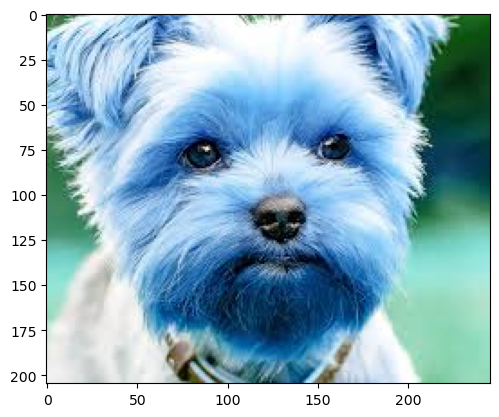

In [36]:
# testing model
img = cv2.imread(r"C:\Users\91752\OneDrive - DIT University\Desktop\val_dog.jpeg")
plt.imshow(img)

In [37]:
img.shape

(205, 246, 3)

In [38]:
img = cv2.resize(img, (256,256))

img = img.reshape((1,256,256,3))

i = model.predict(img)

if i[0][0] < 0.5:
    print("cat")
else:
    print("dog")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
dog


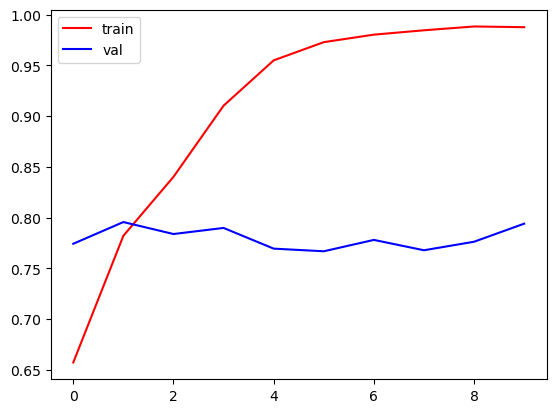

In [32]:
plt.plot(history.history['accuracy'], color = 'red', label='train')
plt.plot(history.history['val_accuracy'], color = 'blue', label='val')
plt.legend()
plt.show()

In [ ]:
cnn = Sequential()

# CNN network
cnn.add(Conv2D(32, (3,3), input_shape = (64,64,3) , activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(32, (3,3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Flatten())

# ANN network
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(54, activation='relu'))
cnn.add(Dense(44, activation='relu'))
cnn.add(Dense(32, activation='relu'))
cnn.add(Dense(16, activation='relu'))
cnn.add(Dense(8, activation='relu'))
cnn.add(Dense(4, activation='relu'))
cnn.add(Dense(1, activation='sigmoid'))

cnn.compile(loss='binary_crossentropy', optimizer='adam')

model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)